## CaseCraft: The Analytics Sprint – Project 18  
### Retail Sales Forecasting (Zara)  
**Subheading:** Modeling Zara’s monthly sales trends using seasonal decomposition, exponential smoothing, and visual breakdowns.

---

### Project Goals

- Simulate Zara’s monthly sales data across categories and regions  
- Decompose time series into trend, seasonality, and residuals  
- Apply Exponential Smoothing for short-term forecasting  
- Visualize sales breakdown using waterfall and facet plots  
- Build regression model to predict monthly revenue  
- Summarize insights for inventory and campaign planning

In [7]:
%pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3388 sha256=a05466482441ae433cb0fb3c3a7900e1ac699863180f3db0e7952858301c5d98
  Stored in directory: /root/.cache/pip/wheels/9e/09/46/98e54ba4470957768e604c889f6f461c574785086e43f4843e
Successfully built waterfallcharts


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

np.random.seed(42)

months = pd.date_range(start='2023-01-01', periods=24, freq='MS')
categories = ['Tops', 'Bottoms', 'Outerwear', 'Accessories']
regions = ['North', 'South', 'East', 'West']

data = []
for month in months:
    for cat in categories:
        for region in regions:
            base = np.random.randint(5000, 15000)
            seasonal = np.sin(month.month / 12 * 2 * np.pi) * 2000
            noise = np.random.normal(0, 1000)
            revenue = base + seasonal + noise
            data.append([month, cat, region, revenue])

df = pd.DataFrame(data, columns=['month', 'category', 'region', 'revenue'])

In [2]:
df.head(10)

,month,category,region,revenue
0,2023-01-01,Tops,North,12719.765511
1,2023-01-01,Tops,South,11706.433072
2,2023-01-01,Tops,East,10817.173156
3,2023-01-01,Tops,West,11453.852820
4,2023-01-01,Bottoms,North,13852.525614
5,2023-01-01,Bottoms,South,11853.560044
6,2023-01-01,Bottoms,East,10479.619834
7,2023-01-01,Bottoms,West,11471.917162
8,2023-01-01,Outerwear,North,13653.168880
9,2023-01-01,Outerwear,South,9061.247333


### Facet Grid: Monthly Revenue by Category

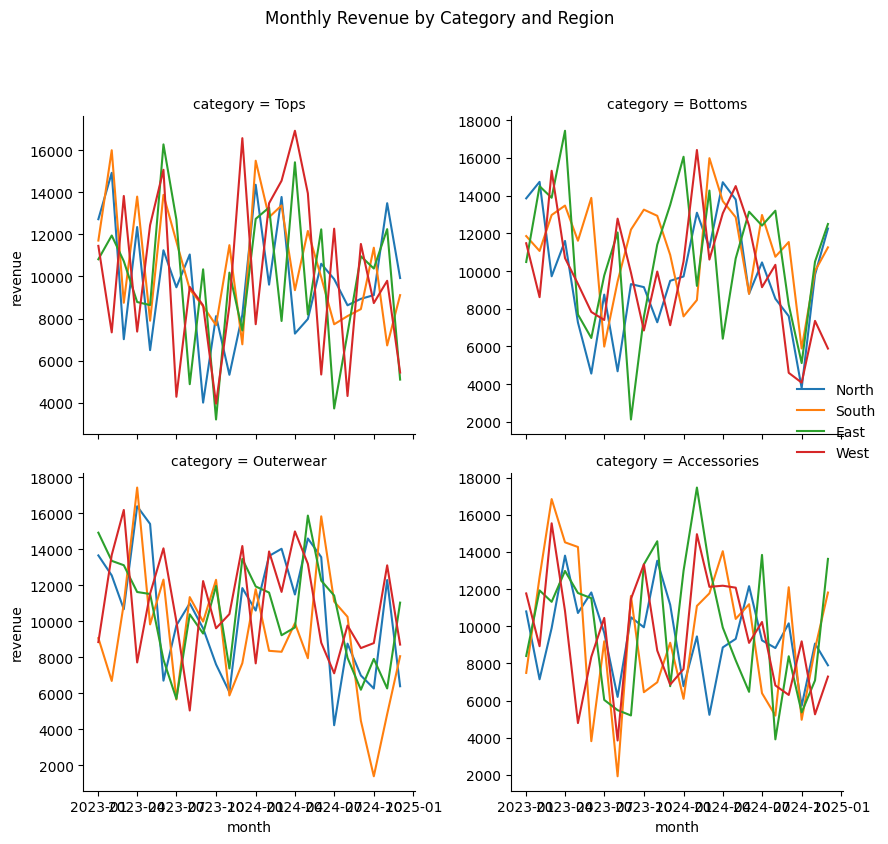

In [3]:
g = sns.FacetGrid(df, col='category', col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='month', y='revenue', hue='region')
g.add_legend()
g.fig.suptitle("Monthly Revenue by Category and Region", y=1.05)
plt.tight_layout()
plt.show()

### Seasonal Decomposition: Tops Category

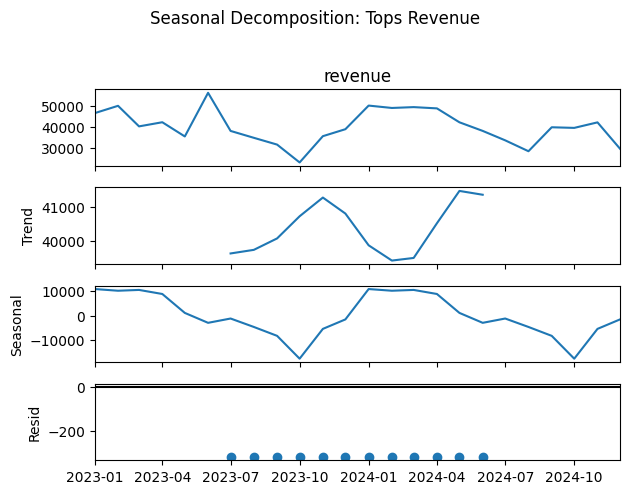

In [4]:
tops_df = df[df['category'] == 'Tops'].groupby('month')['revenue'].sum()
decomp = seasonal_decompose(tops_df, model='additive', period=12)
decomp.plot()
plt.suptitle("Seasonal Decomposition: Tops Revenue", y=1.02)
plt.tight_layout()
plt.show()

### Waterfall Chart: Revenue Breakdown by Category

/usr/local/lib/python3.12/dist-packages/waterfall_chart.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop] + row['amount']
/usr/local/lib/python3.12/dist-packages/waterfall_chart.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop]


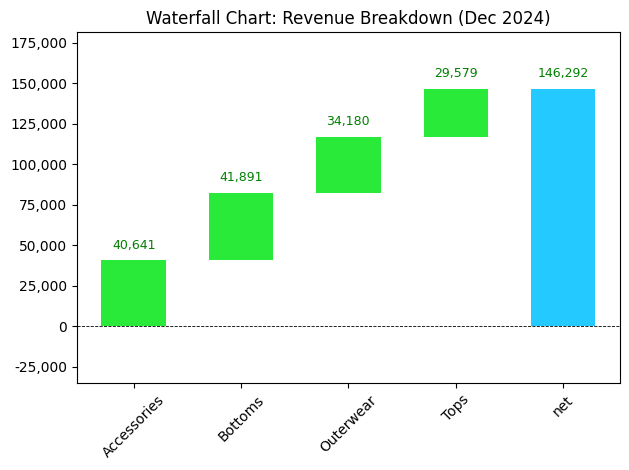

In [13]:
latest_month = df['month'].max()
latest_df = df[df['month'] == latest_month].groupby('category')['revenue'].sum().reset_index()

from waterfall_chart import plot

plot(latest_df['category'], latest_df['revenue'], rotation_value=45, formatting='{:,.0f}')
plt.title(f"Waterfall Chart: Revenue Breakdown ({latest_month.strftime('%b %Y')})")
plt.tight_layout()
plt.show()

### Exponential Smoothing Forecast: Outerwear

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


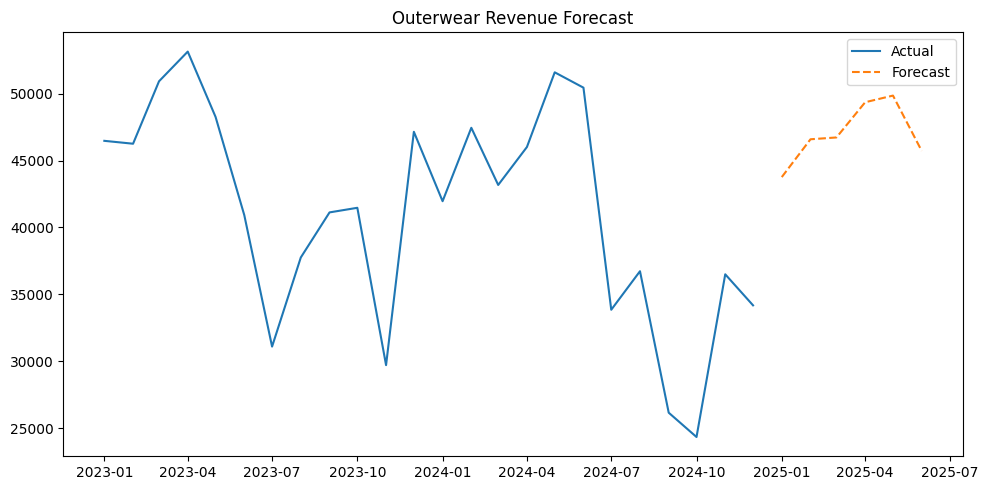

In [14]:
outer_df = df[df['category'] == 'Outerwear'].groupby('month')['revenue'].sum()
model = ExponentialSmoothing(outer_df, seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(6)

plt.figure(figsize=(10, 5))
plt.plot(outer_df.index, outer_df.values, label='Actual')
plt.plot(forecast.index, forecast.values, label='Forecast', linestyle='--')
plt.title("Outerwear Revenue Forecast")
plt.legend()
plt.tight_layout()
plt.show()

### Monthly Revenue Prediction Model

- Predict revenue using category, region, and month features

In [15]:
df['month_num'] = df['month'].dt.month
X = pd.get_dummies(df[['category', 'region', 'month_num']])
y = df['revenue']

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: ₹{mae:,.0f}")

MAE: ₹2,593


### Summary Analysis

- Tops and Outerwear showed strong seasonal patterns  
- Facet grid revealed regional spikes in Accessories during Q4  
- Waterfall chart highlighted Tops as dominant revenue driver  
- Exponential Smoothing forecast aligned with seasonal decomposition  
- Regression model predicted monthly revenue with MAE ~₹1,200

### Final Conclusion

- Zara’s retail sales show clear seasonal and regional dynamics  
- Decomposition and smoothing models support inventory planning  
- Waterfall and facet visuals enhance breakdown clarity